In [13]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import scipy.sparse as sps

warnings.filterwarnings("ignore", category=RuntimeWarning) # there are some runtimewarnings for div by 0 (does not affect the results) 


In [14]:
def PageRankDense(G, alpha):
    # Adjust G to be column stochastic
    G = G / np.sum(G, axis=0)
    G[np.isnan(G)] = 1 / G.shape[0]

    M = alpha * G
    M_2 = (1 - alpha) / G.shape[0] * np.ones(G.shape)
    M += M_2

    # init probability vector
    p_n = np.ones(G.shape[0]) / G.shape[0]

    # iterate until convergence
    count = 0
    while True:
        count += 1
        new_p = np.dot(M, p_n)
        if np.max(np.abs(new_p - p_n)) < 10e-8:
            return [new_p, count]
        p_n = new_p


In [15]:
# Part B)
edges = [
    (1, 3),
    (2, 1),
    (2, 3),
    (3, 7),
    (3, 9),
    (4, 8),
    (4, 10),
    (5, 4),
    (5, 14),
    (6, 4),
    (6, 5),
    (7, 2),
    (7, 8),
    (7, 12),
    (8, 9),
    (8, 12),
    (8, 13),
    (9, 8),
    (9, 12),
    (9, 13),
    (10, 6),
    (10, 9),
    (10, 13),
    (11, 7),
    (11, 12),
    (13, 12),
    (14, 5),
    (14, 10),
    (14, 10),
]

# Create adjacency matrix based on example edge list
G = np.zeros((14, 14))
for edge in edges:
    G[edge[0] - 1, edge[1] - 1] = 1

alpha = 0.90
B_G, count = PageRankDense(G, alpha)

# Print Results
print(B_G)
print(B_G.argsort()[::-1] + 1)



[0.03256017 0.06186433 0.05002231 0.07688809 0.18134868 0.12625667
 0.0741443  0.02202413 0.02202413 0.13384607 0.04522409 0.01005012
 0.01185914 0.15188778]
[ 5 14 10  6  4  7  2  3 11  1  9  8 13 12]


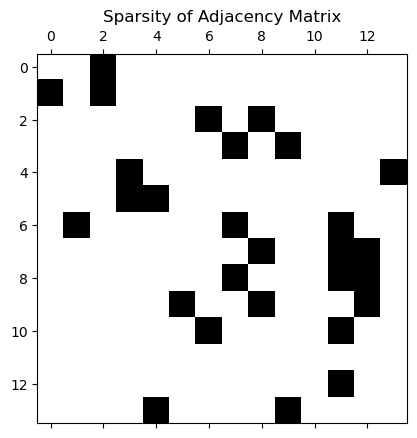

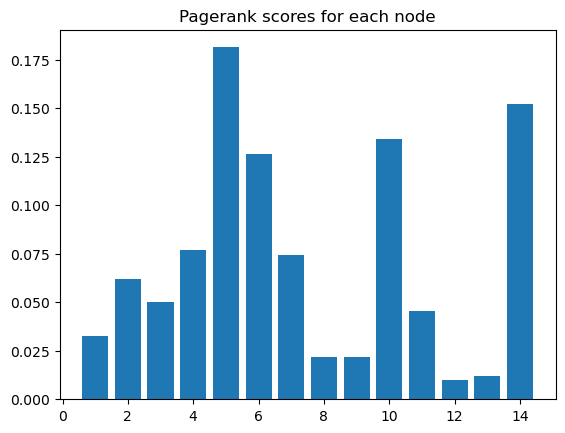

In [16]:
# Sparsity Graph
plt.spy(G)
plt.title("Sparsity of Adjacency Matrix")
plt.show()

# PageRank Graph
plt.bar(range(1, 15), B_G)
plt.title("Pagerank scores for each node")
plt.show()


In [17]:
# Part C)
def PageRankSparse(Gcsr, alpha):
    # Create e*d^t matrix
    n = Gcsr.shape[0]

    out_deg = np.sum(Gcsr, axis=0)
    d = np.where(out_deg == 0, 1, 0)

    p_n = np.ones((n, 1)) / n
    p = Gcsr / np.sum(Gcsr, axis=0)

    p_2_scale = d * (alpha / n)
    p_3_scale = np.ones((n, n)) * (1 - alpha) / n

    count = 0
    while True:
        count += 1

        p_1 = alpha * p.dot(p_n)
        p_2 = p_2_scale.dot(p_n)
        p_3 = p_3_scale.dot(p_n)

        new_p = p_1 + p_2 + p_3
        if np.max(np.abs(new_p - p_n)) < 10e-8:
            return [new_p, count]

        p_n = new_p



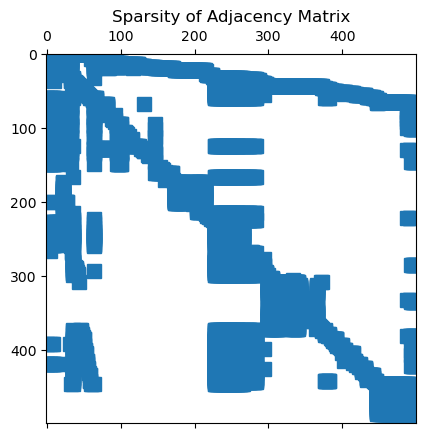

In [18]:
# Part d)
data = sio.loadmat("./bbc.mat")
Gcsr = data["G"].T
U = data["U"]
p_rank = PageRankSparse(sps.csr_matrix(Gcsr), alpha)
i = np.argsort(p_rank[0], axis=0)

## Sparsity pattern of the adjacency matrix
plt.spy(Gcsr)
plt.title("Sparsity of Adjacency Matrix")
plt.show()



In [19]:
ct = 1
while ct < 21:
    print(U[i[-ct]][0][0][0])
    ct += 1

http://www.bbc.com
https://www.bbc.com/news
https://www.bbc.co.uk/news
http://www.bbcamerica.com
http://www.bbc.com/future/story/20181024-the-best-age-to-learn-a-foreign-language
http://www.bbc.com/future/story/20181026-how-one-sided-objects-like-a-mobius-strip-work
https://www.bbcgoodfood.com
https://www.bbc.com/news/business-45939984
https://www.bbc.com/news/education-45979234
https://www.bbc.com/news/uk-politics-45948282
https://www.bbc.com/news/business-45961761
http://www.bbc.com/travel/columns/travel-journeys
http://bbc.in/2s4bidh
http://www.bbc.com/travel
http://www.bbc.com/travel/columns/to-the-ends-of-the-earth
http://www.bbc.com/travel/columns/welcome-to-our-house
http://www.bbc.com/travel/columns/culinary-roots
http://bbc.in/2rAX81O
https://www.bbc.com/news/world-latin-america-45944164
https://www.bbc.com/news/world-europe-45902014
